#Creating Cohorts of Songs
*EDA has been performed to further do the cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.*

**Problem Scenario:**
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cohort = pd.read_csv('/content/rolling_stones_spotify.csv')
cohort.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


#a.	Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

In [ ]:
# Check for null values

cohort.isnull().sum()

,0
Unnamed: 0,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0


In [ ]:
# Drop the extra unwanted column

cohort.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Check if the columns are updated

cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [ ]:
# Inspect the dataset

cohort.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
# Check for the Unique Songs

uni_name = cohort['name'].nunique()
print("The unique names in dataset are: ",uni_name)

The unique names in dataset are:  954


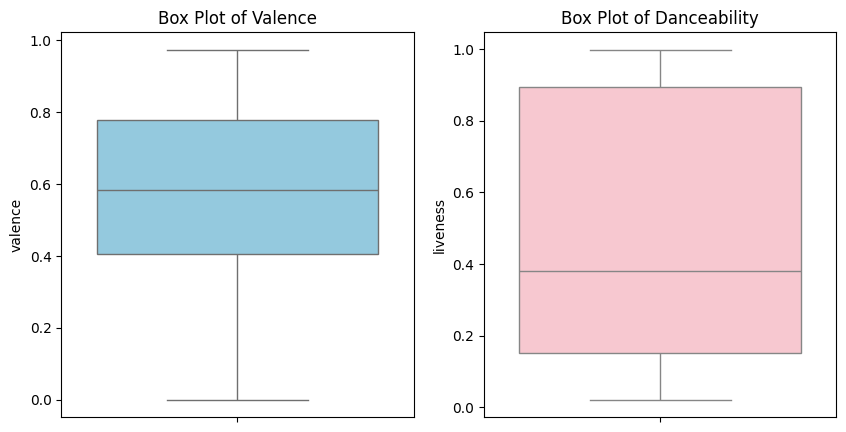

In [ ]:
# Plot BoxPLot to Detect Outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Box Plot of Valence')
sns.boxplot(cohort['valence'], color='skyblue')

plt.subplot(1, 2, 2)
sns.boxplot(cohort['liveness'], color='pink')
plt.title('Box Plot of Danceability')
plt.show()

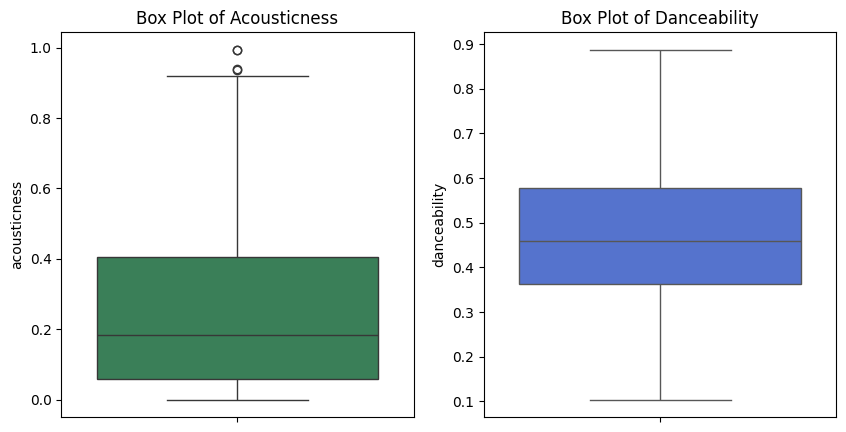

In [ ]:
# Plot Boxplot for acoustic and danceability

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Box Plot of Acousticness')
sns.boxplot(cohort['acousticness'], color='seagreen')

plt.subplot(1, 2, 2)
sns.boxplot(cohort['danceability'], color='royalblue')
plt.title('Box Plot of Danceability')
plt.show()


In [ ]:
#cohort = cohort.drop_duplicates(subset='name')
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


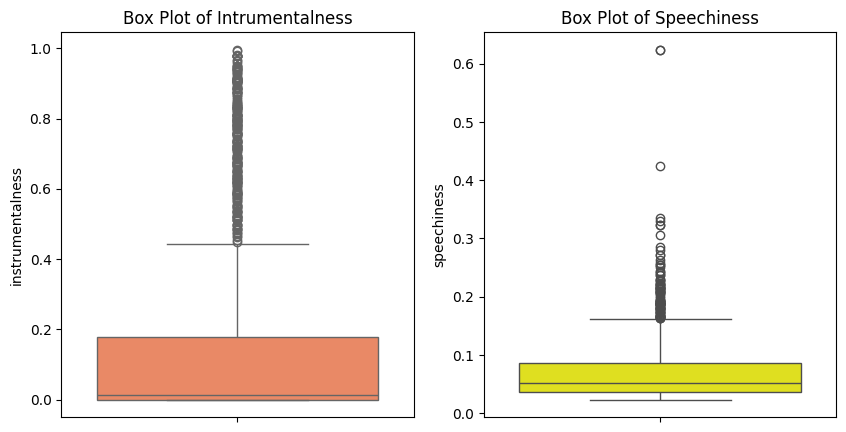

In [ ]:
# BlxPlot to detect Outliers

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Box Plot of Intrumentalness')
sns.boxplot(cohort['instrumentalness'], color='coral')

plt.subplot(1, 2, 2)
sns.boxplot(cohort['speechiness'], color='yellow')
plt.title('Box Plot of Speechiness')
plt.show()

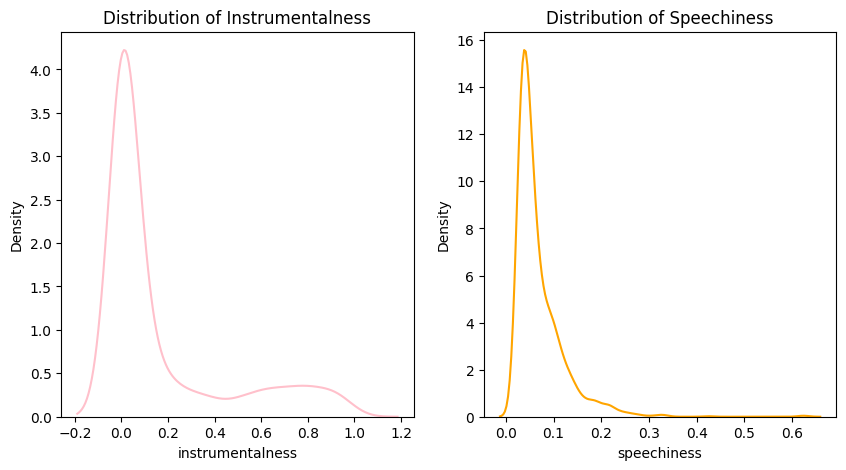

In [ ]:
# Plot Distribution for Speechiness and Instrumentalness
from scipy import stats

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Instrumentalness')
sns.kdeplot(cohort['instrumentalness'],color='pink')

plt.subplot(1, 2, 2)
plt.title('Distribution of Speechiness')
sns.kdeplot(cohort['speechiness'], color='orange')
plt.show()


# Decision: -
This is a peculiar scenario where we have the main data values in the outliers and outliers in the main data, therefore we will keep this data as is.

In [ ]:
uni_id = cohort['id'].nunique()
uni_id

1610

In [ ]:
df = cohort[['id', 'name', 'album']]

In [ ]:
df1  = df.groupby('name')['id'].count().reset_index()
df1.head()

,name,id
0,(I Can't Get No) Satisfaction - Live,9
1,(I Can't Get No) Satisfaction - Live / Remaste...,2
2,(I Can't Get No) Satisfaction - Live At Death ...,1
3,(I Can't Get No) Satisfaction - Live At Madiso...,1
4,(I Can't Get No) Satisfaction - Live At Univer...,1


In [ ]:
df['name'].sort_values()

,name
211,(I Can't Get No) Satisfaction - Live
1390,(I Can't Get No) Satisfaction - Live
287,(I Can't Get No) Satisfaction - Live
467,(I Can't Get No) Satisfaction - Live
189,(I Can't Get No) Satisfaction - Live
...,...
973,You Gotta Move - Live / Remastered 2009
1214,You Gotta Move - Live From Madison Square Gard...
945,You Win Again
923,You Win Again


#2.	Refine the data for further processing based on your findings

In [ ]:
# Drop duplicates from the song names
cohort = cohort.drop_duplicates(subset='name')

#3.	Perform exploratory data analysis and feature engineering

#a.	Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [ ]:
uni_pop = cohort['popularity'].unique()
uni_pop.sort()
uni_pop

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51,
       53, 54, 55, 56, 58, 59, 61, 63, 64, 69, 72, 73, 76, 80])

In [ ]:
# Set the popularity threshold

popularity_threshold = 75

# Create a popularity threshold filter

popular_songs_filter = cohort[cohort['popularity'] >= popularity_threshold]

# Count popular songs per album

popular_song_by_album = popular_songs_filter['album'].value_counts().sort_values(ascending=False)

# Identify top two albums

top_two_albums = popular_song_by_album.head(2)

print("Top 2 Albums based on number of popular songs:\n", top_two_albums)

Top 2 Albums based on number of popular songs:
 album
Tattoo You (2009 Re-Mastered)    1
Aftermath                        1
Name: count, dtype: int64


<ipython-input-21-e9df9208fad2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_song_by_album.index, y=popular_song_by_album.values, palette="mako")


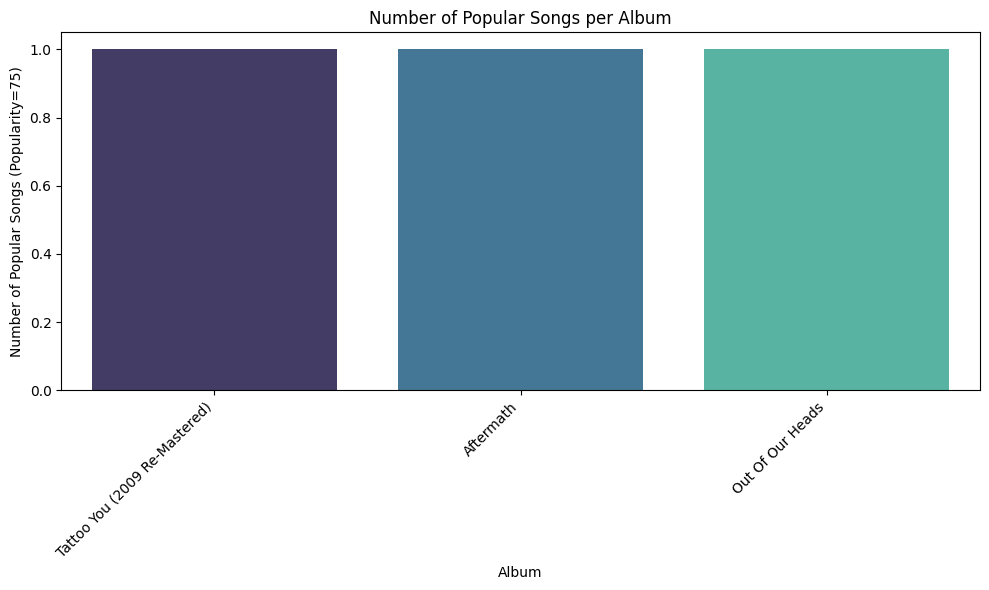

In [ ]:
# Display the Number of popular Songs per Album

plt.figure(figsize=(10,6))
sns.barplot(x=popular_song_by_album.index, y=popular_song_by_album.values, palette="mako")
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs (Popularity={})'.format(popularity_threshold))
plt.title('Number of Popular Songs per Album')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-22-d6326f1f67db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_two_albums.index, y=top_two_albums.values, palette="inferno")


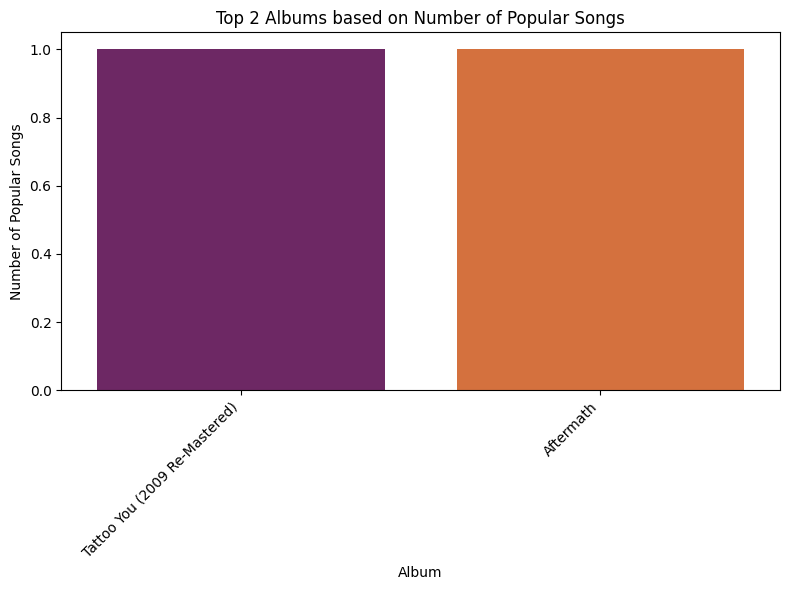

In [ ]:
# Top Two Albums with most number of popular songs

plt.figure(figsize=(8,6))
sns.barplot(x=top_two_albums.index, y=top_two_albums.values, palette="inferno")
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.title('Top 2 Albums based on Number of Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#b.	Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 1594
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              954 non-null    object 
 1   album             954 non-null    object 
 2   release_date      954 non-null    object 
 3   track_number      954 non-null    int64  
 4   id                954 non-null    object 
 5   uri               954 non-null    object 
 6   acousticness      954 non-null    float64
 7   danceability      954 non-null    float64
 8   energy            954 non-null    float64
 9   instrumentalness  954 non-null    float64
 10  liveness          954 non-null    float64
 11  loudness          954 non-null    float64
 12  speechiness       954 non-null    float64
 13  tempo             954 non-null    float64
 14  valence           954 non-null    float64
 15  popularity        954 non-null    int64  
 16  duration_ms       954 non-null    int64  
dtypes

In [ ]:
# Check the stats for Speechiness

vocal_max = cohort['speechiness'].max()
vocal_mean = cohort['speechiness'].mean()
vocal_min = cohort['speechiness'].min()
vocal_median = cohort['speechiness'].median()
vocal_mode = cohort['speechiness'].mode()

print("Max: ", vocal_max)
print("Mean: ", vocal_mean)
print("Min: ", vocal_min)
print("Median: ", vocal_median)
print("Mode: ", vocal_mode)

Max:  0.624
Mean:  0.06939276729559749
Min:  0.0232
Median:  0.0506
Mode:  0    0.118
Name: speechiness, dtype: float64


In [ ]:
# Check the songs with max duration

max_duration = cohort['duration_ms'].max()

max_duration_filter = cohort[cohort['duration_ms'] == max_duration]

len_song = max_duration_filter['name'].value_counts().sort_values(ascending=False)

len_song_df = pd.DataFrame(len_song)

print("\t\t The songs with highest duration")
print("-" * 50)
print(len_song_df)

		 The songs with highest duration
--------------------------------------------------
                                                    count
name                                                     
Midnight Rambler - Live At University Of Leeds ...      1


In [ ]:
# Check for the instrumental track

instrumental_threshold = 0.5

instrumental_filter = cohort[cohort['instrumentalness'] >= instrumental_threshold]

instrumental_songs = instrumental_filter['name'].value_counts()

instrumental_songs_df = pd.DataFrame(instrumental_songs)

print("\t The instrumental songs are: ")
print("-" * 50)
print(instrumental_songs_df)
print("-"* 50)


	 The instrumental songs are: 
--------------------------------------------------
                                                count
name                                                 
Concert Intro Music - Live                          1
It's Only Rock 'N' Roll - Live                      1
Brown Sugar - Live                                  1
Jumpin Jack Flash - Live                            1
Rip This Joint - Live At The El Mocambo 1977        1
...                                               ...
2120 South Michigan Avenue - Long Version           1
Not Fade Away - Mono Version                        1
I Just Want To Make Love To You - Mono Version      1
Honest I Do                                         1
Now I've Got A Witness                              1

[146 rows x 1 columns]
--------------------------------------------------


In [ ]:
# Check for the speechiness track between 0.66 and 0.33

speechiness_threshold = 0.3

speechiness_filter = cohort[(cohort['speechiness'] >= speechiness_threshold) & (cohort['speechiness'] <= 0.6)]

vocal_songs = speechiness_filter['name'].value_counts()

vocal_songs_df = pd.DataFrame(vocal_songs)

print("\t The speechiness songs are: ")
print("-" * 50)
print(vocal_songs_df)
print("-"* 50)


	 The speechiness songs are: 
--------------------------------------------------
                                                   count
name                                                    
Band Introductions - Live at Wembley Stadium 1982      1
Rocks Off - Live                                       1
Charlie's Intro To Little Red Rooster - Live           1
Everybody Needs Somebody To Love (Finale) - Live       1
--------------------------------------------------


In [ ]:
# Do the danceable songs have high tempo
min_tempo = cohort['tempo'].min()
max_tempo = cohort['tempo'].max()
mean_tempo = cohort['tempo'].mean()
median_tempo = cohort['tempo'].median()


print("Min Tempo: ", min_tempo)
print("Max Tempo: ", max_tempo)
print("Mean Tempo: ", mean_tempo)
print("Median Tempo: ", median_tempo)

print('-'*50)

for danceability, tempo in zip(cohort['danceability'], cohort['tempo']):
  if danceability >= 0.7:
    print(f"Danceability: {danceability}, Tempo: {tempo}")


Min Tempo:  46.525
Max Tempo:  216.304
Mean Tempo:  125.65384905660378
Median Tempo:  123.509
--------------------------------------------------
Danceability: 0.781, Tempo: 100.709
Danceability: 0.794, Tempo: 109.685
Danceability: 0.741, Tempo: 121.752
Danceability: 0.784, Tempo: 100.1
Danceability: 0.743, Tempo: 122.217
Danceability: 0.765, Tempo: 96.359
Danceability: 0.711, Tempo: 117.807
Danceability: 0.758, Tempo: 114.685
Danceability: 0.771, Tempo: 110.622
Danceability: 0.708, Tempo: 82.327
Danceability: 0.737, Tempo: 108.819
Danceability: 0.723, Tempo: 75.028
Danceability: 0.72, Tempo: 113.065
Danceability: 0.7, Tempo: 108.974
Danceability: 0.719, Tempo: 107.448
Danceability: 0.716, Tempo: 107.449
Danceability: 0.708, Tempo: 112.087
Danceability: 0.725, Tempo: 102.548
Danceability: 0.742, Tempo: 121.747
Danceability: 0.727, Tempo: 130.971
Danceability: 0.72, Tempo: 131.006
Danceability: 0.74, Tempo: 107.411
Danceability: 0.768, Tempo: 94.268
Danceability: 0.735, Tempo: 97.538
Dan

In [ ]:
# The names of the top 5 danceable songs

danceable_threshold = 0.7

danceable_filter = cohort[cohort['danceability'] >= danceable_threshold]

danceable_songs = danceable_filter['name'].value_counts().sort_values(ascending=True)

danceable_songs_df = pd.DataFrame(danceable_songs)

top_five_danceable_songs = danceable_songs_df.head(5)

print("\t The most danceable songs are: ")
print("-" * 50)
print(top_five_danceable_songs)

	 The most danceable songs are: 
--------------------------------------------------
                 count
name                  
Beast Of Burden      1
Miss You             1
Harlem Shuffle       1
Hot Stuff            1
Out Of Control       1


#c.	Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

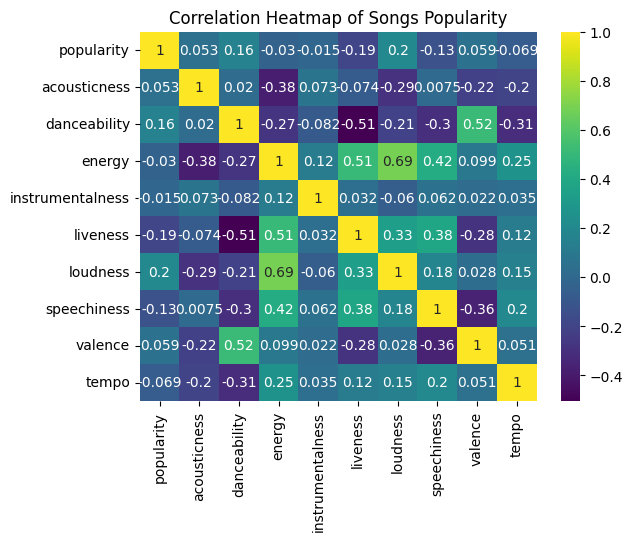

In [ ]:
correlation_df = cohort[['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]
correlation = correlation_df.corr()

sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Songs Popularity')
plt.show()

#d.	Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

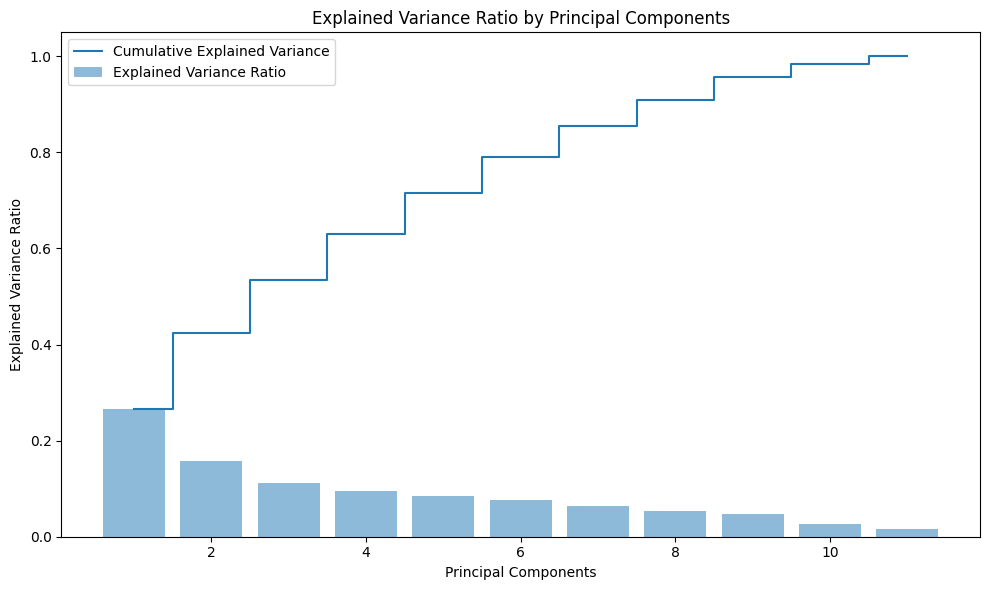

In [ ]:
# Perform PCA to see if the features with lower Eigenvalues can be discarded from
# the feature for a lower dimension

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = cohort.drop(columns=['popularity', 'name', 'id', 'album', 'uri', 'release_date'])
y = cohort['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA without reducing dimensionality to find the optimal number of components

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the Explained Variance

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Explained Variance Ratio')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

**Observation**:

The plot shows that each of the 11 principal components explains a dissimilar amount of variance individually, while the cumulative explained variance slowly increases, approaching 100% by the 11th component.

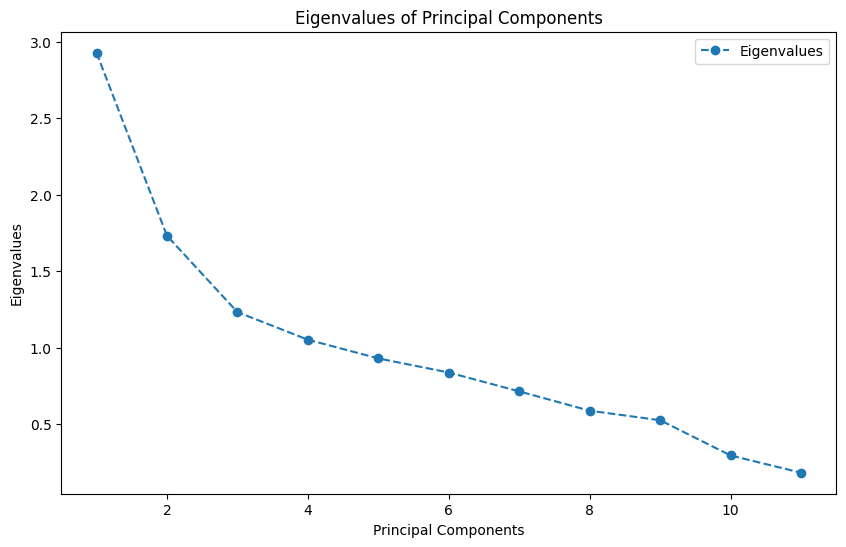

In [ ]:
# Eigenvalues (which are proportional to the explained variance)

eigenvalues = pca.explained_variance_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of Principal Components')
plt.legend()
plt.show()

***Observation***

The Eigenvalues fell sharply from component 1 to 2 as variance is often concentrated and substantial within the first few components. After 2nd component it starts to fall gradually until it reaches the 9th component.

This pattern depicts that the first few components capture most of the variance in the data, with diminishing returns for each additional component beyond the 8th or 8th. Thus, the plot suggests that the optimal number of principal components is around 8 or 9.

This reduction in dimensionality will lead to a better model performance and reduced redundancy as components with tiny variance could introduce noise in the data.


In [ ]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Create DataFrames with Components

df_train_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_train_pca['Target'] = y_train
df_test_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_test_pca['Target'] = y_test

In [ ]:
tr = df_train_pca['Target']
tr

,Target
0,33.0
1,34.0
2,34.0
3,32.0
4,32.0
...,...
758,25.0
759,34.0
760,25.0
761,NaN


#4.	Perform cluster analysis
a.	Identify the right number of clusters


In [ ]:
from sklearn.preprocessing import StandardScaler

X = cohort[['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'loudness',	'speechiness',	'tempo',	'valence',	'duration_ms']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

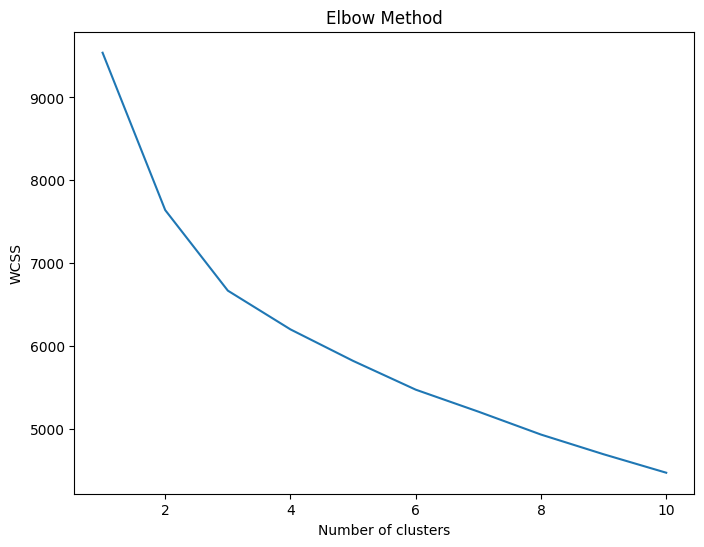

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Fit on scaled original features
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Select the number of clusters from the elbow method

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)

kmeans.fit(X_scaled)

# Get the cluster labels

y_kmeans = kmeans.labels_

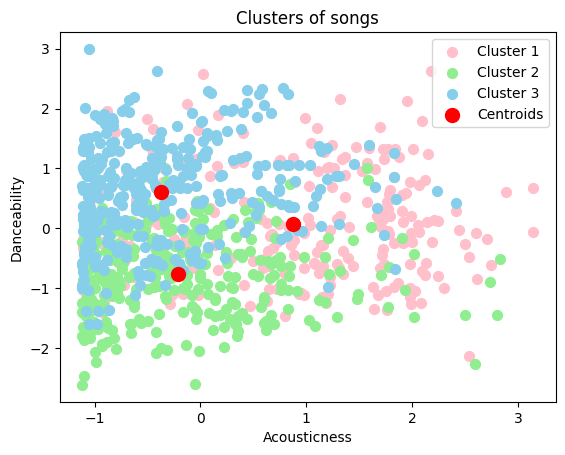

In [ ]:
# Plot the visualization

plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 50, c = 'pink', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 50, c = 'lightgreen', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 50, c = 'skyblue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend()
plt.show()

In [ ]:
# Get Scaled Value

scaled_centroid = kmeans.cluster_centers_

centroids = scaler.inverse_transform(scaled_centroid)

centroid_df = pd.DataFrame(centroids, columns=['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Duration_ms'])

print("\tAverage Values per Cluster of the Features\n")
print('-' * 50)
print(centroid_df)

	Average Values per Cluster of the Features

--------------------------------------------------
   Acousticness  Danceability    Energy  Instrumentalness  Liveness  Loudness  \
0      0.464844      0.477946  0.566813          0.098663  0.294414 -9.560000   
1      0.211272      0.362861  0.925909          0.181103  0.815196 -5.193330   
2      0.174327      0.554478  0.815272          0.181870  0.285813 -6.676433   

   Speechiness       Tempo   Valence    Duration_ms  
0     0.047698  109.026436  0.441694  261998.547718  
1     0.108358  139.931633  0.465791  279538.021212  
2     0.049471  123.814522  0.772444  228623.579634  


In [ ]:
# Analyze this DataFrame to understand each cluster

print("\n--- Interpretation of 1st Cluster ---")
print(centroid_df.iloc[0])
print('-' * 50)
print("\tThis cluster has:")
if centroid_df.iloc[0]['Acousticness'] > centroid_df['Acousticness'].mean():
  print("Higher than mean acousticness")
else:
  print("Lower acousticness")
if centroid_df.iloc[0]['Danceability'] > centroid_df['Danceability'].mean():
  print("Higher than mean Danceability")
else:
  print("Lower Danceability")
print('-' * 50)
print("\n--- Interpretation of 2nd Cluster ---")
print(centroid_df.iloc[1])
print('-' * 50)
print("\tThis cluster has:")
if centroid_df.iloc[1]['Energy'] > centroid_df['Energy'].mean():
  print("Higher than mean Energy")
else:
  print("Lower Energy")
if centroid_df.iloc[1]['Tempo'] > centroid_df['Tempo'].mean():
  print("Higher than average Tempo")
else:
  print("Lower Tempo")
print('-' * 50)
print("\n--- Interpretation of 3rd Cluster ---")
print(centroid_df.iloc[2])
print('-' * 50)
print("\tThis cluster has:")
if centroid_df.iloc[2]['Instrumentalness'] > centroid_df['Instrumentalness'].mean():
  print("Higher than mean Instrumentalness")
else:
  print("Lower Instrumentalness")
if centroid_df.iloc[2]['Liveness'] > centroid_df['Liveness'].mean():
  print("Higher than mean liveness")
else:
  print("Lower liveness")


--- Interpretation of 1st Cluster ---
Acousticness             0.464844
Danceability             0.477946
Energy                   0.566813
Instrumentalness         0.098663
Liveness                 0.294414
Loudness                -9.560000
Speechiness              0.047698
Tempo                  109.026436
Valence                  0.441694
Duration_ms         261998.547718
Name: 0, dtype: float64
--------------------------------------------------
	This cluster has:
Higher than mean acousticness
Higher than mean Danceability
--------------------------------------------------

--- Interpretation of 2nd Cluster ---
Acousticness             0.211272
Danceability             0.362861
Energy                   0.925909
Instrumentalness         0.181103
Liveness                 0.815196
Loudness                -5.193330
Speechiness              0.108358
Tempo                  139.931633
Valence                  0.465791
Duration_ms         279538.021212
Name: 1, dtype: float64
-------------